In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import random
import seaborn as sns

### Degrees of Freedom

Degrees of freedom of an **undetermined** mathematical system states how many parameters of it can be decided freely, before the system is **determined**.

Undetermined -> Not enough evidence (data) for certainty.

x + y + z = 10
What are the values of x, y and z?

Determined: Values of all variables have set values. We can calculate them using equations.

Undetermined: Some of its variables don't have set values. We can not calculate them. There are free parameters.

x + y + z = 10 -> x = 10 - y - z

y and z are free parameters, they can take any value. x depends on y and z. Also, we can rearrange the equation to make y or z to be dependent.

number of free parameters = degrees of freedom

How to calculate degrees of freedom?
3 variables - 1 equation = 2 degrees of freedom

### Point and Interval Estimations

Point estimation: Estimating the parameter's value

Interval estimation: Estimating a range (interval) for the parameter's value (with some confidence)

### Estimation

Estimation is used in cases where the information is incomplete.

Such as, what is the average age of tourists visiting Sultan Ahmet Mosque?

Estimation theory: Developing simple estimators of population parameters when information is incomplete or obeys a complex function.

-> Estimation relies on 1. Sampling, 2. Mathematical derivation

- Draw small samples of the population
- Use statistics of the small sample to estimate parameters of the whole population.

-> Go to Sultan Ahmet Mosque, ask some of the tourists how old they are: Sampling
- Mean, median, mode of the sample?
- Average of minimum and maximum values of the sample?
- All would give a *nice estimation* of mean.

Select 10 values from a data table randomly, calculate mean of the 10 values. Repeat 200 times. How will be the 200 means distributed? Histogram for frequency distribution of the means. 

Expected value of the sampling distribution is an unbiased estimation of population mean.

### Estimator theta

When choosing an estimatior, we prefer an **unbiased estimatior**. Also, we prefer a **minimum variance estimator**. We derive them mathematically.

Maximum Likelihood Estimators: MLE

Sample mean is a minimum variance estimator -> preferred over others

In [133]:
test = np.random.rand(1, 1000)

In [139]:
def RandomSelection(l, sample_size):
    temp = test.tolist()[0]
    list1 = []
    for i in range(int(l.shape[1]/sample_size)):
        list2 = []
        for k in range(sample_size):
            list2.append(temp.pop())
        
        list1.append(list2)
            
    return list1

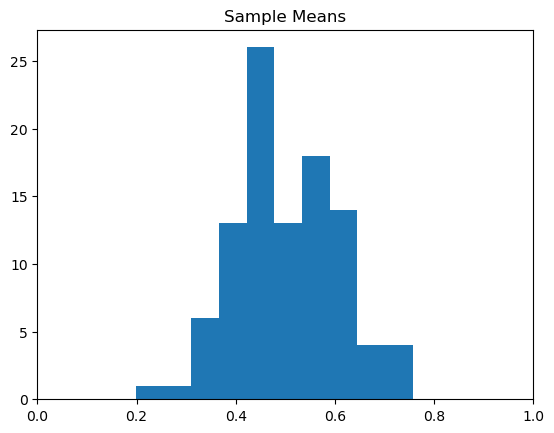

In [140]:
plt.hist([np.mean(np.array(i)) for i in RandomSelection(test, 10)])
plt.xlim([0, 1])
plt.title("Sample Means")
plt.show()

In [142]:
[np.mean(np.array(i)) for i in RandomSelection(test, 10)][:5]

[0.4573649827051181,
 0.48661721491912474,
 0.6190205472728294,
 0.49179124962496773,
 0.5537627995689361]

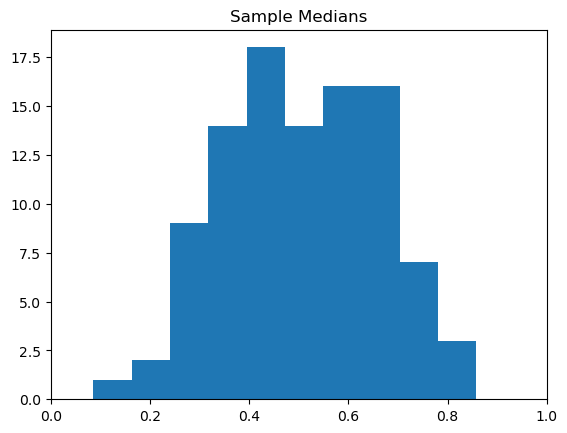

In [143]:
plt.hist([np.median(np.array(i)) for i in RandomSelection(test, 10)])
plt.xlim([0, 1])
plt.title("Sample Medians")
plt.show()

In [145]:
[np.median(np.array(i)) for i in RandomSelection(test, 10)][:5]

[0.45756572281032953,
 0.43179263592179284,
 0.6804348058643699,
 0.5632248914201385,
 0.567662096712265]

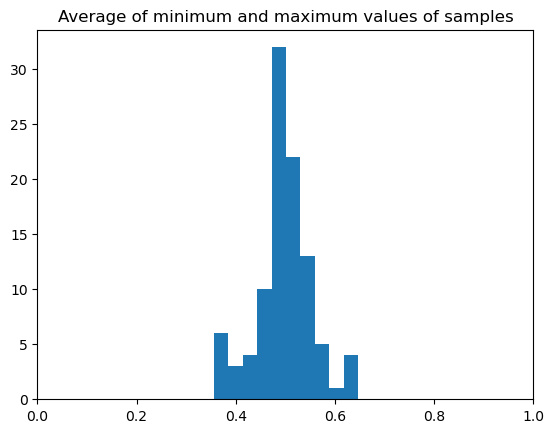

In [146]:
plt.hist([np.mean([np.min(np.array(i)), np.max(np.array(i))]) for i in RandomSelection(test, 10)])
plt.xlim([0, 1])
plt.title("Average of minimum and maximum values of samples")
plt.show()

### Variance of mean depends on sample size

Variance of the estimator depends on sample size. 

Variance of mean = sigma^2 / n
Standard deviation = sigma / sqrt(n)

Standard error of the mean:
The error made when estimating the mean of the population.
Error gets smaller if the sample size (n) is large.

In [161]:
[print(i[0]) for i in RandomSelection(test, 10)[:5]]

0.4387880605804738
0.3465036290337177
0.9740210464317675
0.46443739224707137
0.48552420157031484


[None, None, None, None, None]

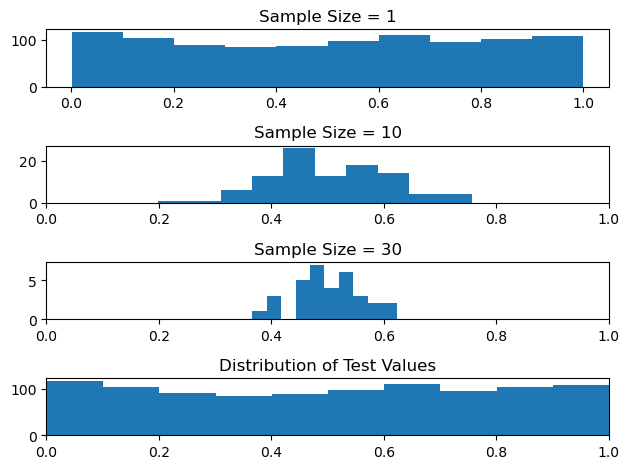

In [212]:
fig, ax = plt.subplots(4)

ax[0].hist([i[0] for i in RandomSelection(test, 1)])
ax[0].set_title("Sample Size = 1")
ax[1].hist([np.mean(np.array(i)) for i in RandomSelection(test, 10)])
ax[1].set_title("Sample Size = 10")
ax[1].set_xlim([0, 1])
ax[2].hist([np.mean(np.array(i)) for i in RandomSelection(test, 30)])
ax[2].set_title("Sample Size = 30")
ax[2].set_xlim([0, 1])
ax[3].hist(test[0], bins=10)
ax[3].set_title("Distribution of Test Values")
ax[3].set_xlim([0, 1])

fig.tight_layout()
plt.show()

### Central Limit Theorem

Distribution of mean of samples are normal if sample size is large enough.

(array([221., 175., 186., 206., 212.]),
 array([0.00138159, 0.20109809, 0.40081458, 0.60053108, 0.80024758,
        0.99996408]),
 <BarContainer object of 5 artists>)

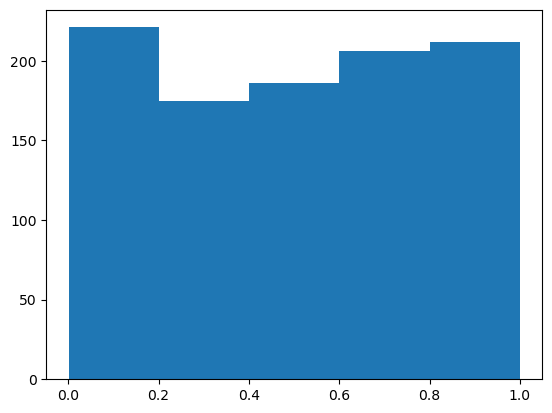

In [211]:
plt.hist(test[0], bins=5)

/home/barisaltunkara/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


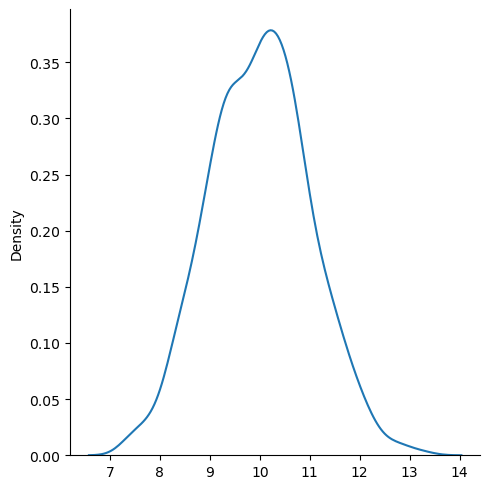

In [232]:
test1 = np.random.normal(10, 1, 1000)
sns.displot(test1, kind="kde")

### ----------------------------

If we re-express X in standardized form by

**Z = (X - u) / (sigma / sqrt(n))**

then Z should follow a standard normal distribution.

We can estimate the value of mean: **point estimation**
We can estimate interval of the mean: **interval estimation**
by using the properties of Normal Distribution.

If we knew u and sigma of the population:
**u = X - Z * (sigma / sqrt(n))**

We know probability of Z being between -1 and 1 is 68%
Then u is between **X - 1*(sigma / sqrt(n))** and **X + 1*(sigma / sqrt(n))** with a probability of 0.68.

We could use the sample to calculate X, then use sigma and sample size to estimate an interval for u, with a probability of Y (0.68 or 0.95 etc.).

But we don't know **sigma and sigma / sqrt(n)** is estimated by **s / sqrt(n)**

That's why we use t-distribution.

### t-distribution

t = (X - u) / (s / sqrt(n)

t-value is ratio of "departure of the estimator from the parameter to the "standard error".

t-values follow "t-distribution" or "Student's t-distribution.

In t-distribution, degrees of freedom is **n-1**.

Shape of t-distribution depends on degrees of freedom (df).

When df is very large, t-distribution converges to normal distribution.

In [462]:
def GammaFunc(v):
    num = 1
    if v % 2 == 0:
        for i in np.arange(3, v, 2):
            num *= i/(i-1)
    elif v % 2 ==1:
        for k in np.arange(2, v, 2):
            num *= k/(k-1)
    
    return num

In [463]:
num = 1
for i in np.arange(2, 99, 2):
    num *= i/(i-1)
    
num

12.438867772836337

In [464]:
def TDist(x):
    fp = GammaFunc(len(x)) / math.sqrt((len(x) -1 )*math.pi)
    sp = (1 + (((x - np.mean(x)) * np.sqrt(len(x)) / np.std(x))**2) / (len(x) - 1))**(-1*len(x)/2)
    
    return fp * sp

In [465]:
test2 = np.sort(np.random.rand(100)*10)

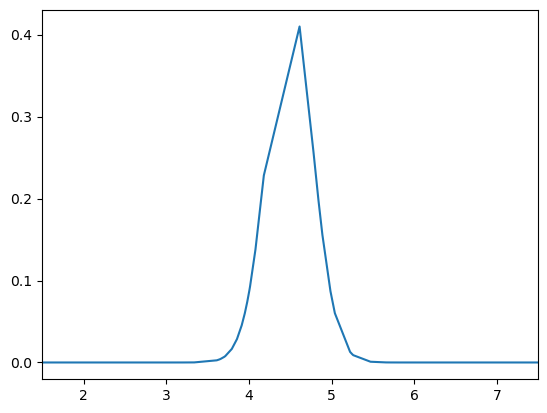

In [467]:
plt.plot(test2, TDist(test2))
plt.xlim([test2.mean()-3, test2.mean()+3])
plt.show()

In [238]:
math.sqrt((len(np.arange(1, 100)) -1 )*math.pi)

17.546397922417004

In [488]:
stats.t.pdf(1, 1000-1)

0.2418496685467284

(array([  5.,  17.,  81., 150., 236., 225., 163.,  86.,  23.,  14.]),
 array([-98.34733103, -79.04000132, -59.73267161, -40.4253419 ,
        -21.11801219,  -1.81068248,  17.49664723,  36.80397694,
         56.11130665,  75.41863636,  94.72596608]),
 <BarContainer object of 10 artists>)

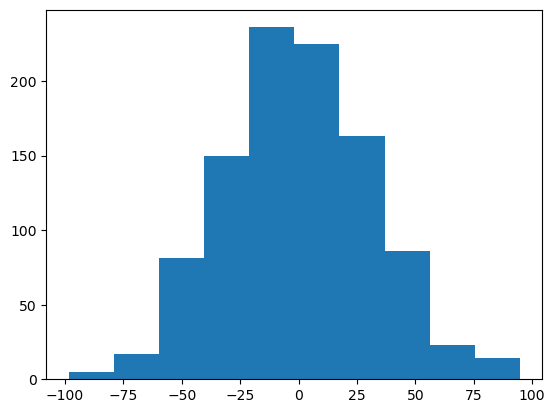

In [487]:
a1 = np.random.normal(10, 1, 1000)
plt.hist((a1-a1.mean())/(a1.std()/np.sqrt(len(a1)-1)))

(array([0.00995355, 0.08460518, 0.16257466, 0.31021899, 0.3964831 ,
        0.32349039, 0.23722629, 0.08958195, 0.03483743, 0.00995355]),
 array([ 7.20334325,  7.80614323,  8.4089432 ,  9.01174318,  9.61454315,
        10.21734313, 10.8201431 , 11.42294308, 12.02574305, 12.62854302,
        13.231343  ]),
 <BarContainer object of 10 artists>)

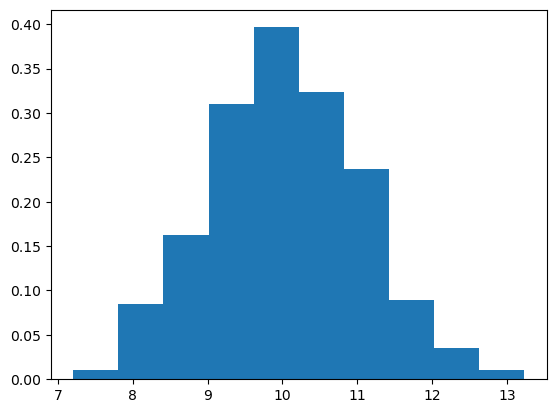

In [360]:
plt.hist(a1, density=True)

In [311]:
stats.t.pdf(2, 100)

0.054908643295411376

In [339]:
stats.t.pdf(0.1, 20)

0.39192608003344537

In [485]:
sa1 = np.sort(a1)
ta1 = (sa1 - np.mean(a1))  / np.std(sa1)
pa1 = stats.t.pdf(ta1, len(ta1)-1)

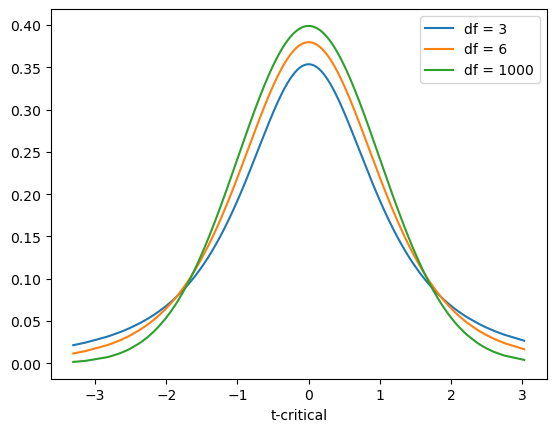

In [486]:
legend = []
for i in [3, 6, 1000]:
    plt.plot(ta1, stats.t.pdf(ta1, i-1))
    legend.append(f"df = {i}")
    
plt.legend(legend)
plt.xlabel("t-critical")
plt.show()

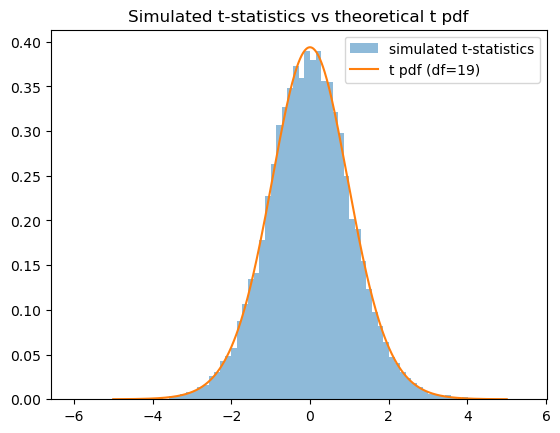

In [351]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n = 20
mu0 = 0.0
reps = 20000

t_stats = []
for _ in range(reps):
    x = np.random.normal(loc=mu0, scale=1.0, size=n)
    t = (x.mean() - mu0) / (x.std(ddof=1)/np.sqrt(n))
    t_stats.append(t)

# Histogram of simulated t-statistics
plt.hist(t_stats, bins=80, density=True, alpha=0.5, label='simulated t-statistics')

# Theoretical t pdf
x = np.linspace(-5, 5, 500)
plt.plot(x, stats.t.pdf(x, df=n-1), label=f't pdf (df={n-1})')

plt.legend()
plt.title('Simulated t-statistics vs theoretical t pdf')
plt.show()


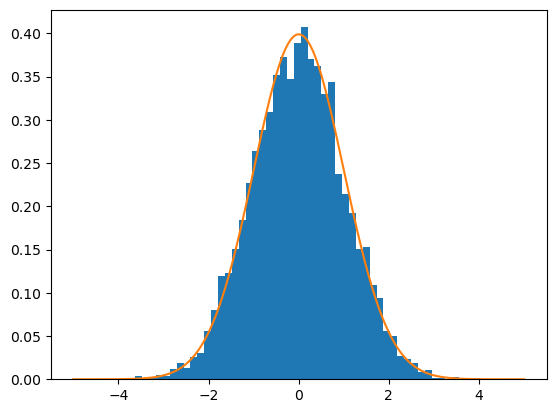

In [364]:
# örnek ortalaması t-dağılımı simülasyonu
n = 1000
reps = 5000
t_stats = []
for _ in range(reps):
    x = np.random.normal(loc=10, scale=1, size=n)
    t = (x.mean() - 10) / (x.std(ddof=1) / np.sqrt(n))  # mu0=10 örneği
    t_stats.append(t)

plt.hist(t_stats, bins=50, density=True)
x = np.linspace(-5, 5, 400)
from scipy import stats
plt.plot(x, stats.t.pdf(x, df=n-1))


### Confidence Intervals

**t = (X - u) / (s / sqrt(n))** => **u = X - t * (s/sqrt(n))**

For confidence intervals we can say tail of the one end has **alpha/2** probability. Other tail has exactly the same probability. 
**t(alpha/2) = -t(1-alpha/2)**

So, area in the confidence interval is **1-alpha**.

Confidence interval for a given sample mean **X**, **t**, **s** and **n** can be written like this:
**X - t(alpha/2) * (s/sqrt(n)) < u < X + t(alpha/2) * (s/sqrt(n))**

In [492]:
116.9 - stats.t.ppf(0.975, 9) * 21.7 / math.sqrt(10), 116.9 + stats.t.ppf(0.975, 9) * 21.7 / math.sqrt(10)

(101.37675514005304, 132.42324485994698)

In [491]:
stats.t.ppf(0.975, 9)

2.2621571628540993

In [45]:
stats.ttest_ind([1, 2, 3, 4], [2, 2, 3, 4])

TtestResult(statistic=-0.3110855084191276, pvalue=0.7662600657593479, df=6.0)

In [46]:
stats.ttest_ind([10, 20, 30, 40], [2, 2, 3, 4])

TtestResult(statistic=3.437514974426043, pvalue=0.013843034360507309, df=6.0)

### Confidence Intervals

Frequentist statement:
Over the collection of all 95% CIs that could be constructed from repeated random samples of size n, 95% will contain the parameter u.

Bayesian statement:
Each 95% CI has 95% probability that u lies in it.

Length of a CI is governed by: n, s, alpha

When s or alpha increases, length of CI increases.

When n increases, length of CI decreases.

When n is very large, Z-value can be used instead of t-value.

### Variance Estimation

**s^2 = (1/(n-1)) * sum((xi - x)^2)**

If n is very large, s^2 converges to sigma^2

Variance use **Chi-square** distribution.

In [501]:
stats.chi2.ppf(0.025, 9), stats.chi2.ppf(0.975, 9)

(2.7003894999803584, 19.02276779864163)

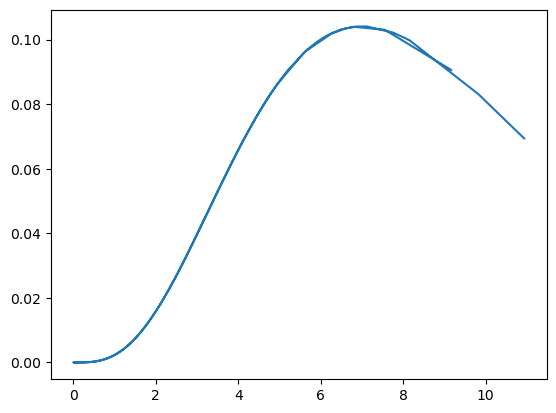

In [514]:
plt.plot(((sa1-sa1.mean())**2)/(sa1.std()**2), stats.chi2.pdf(((sa1-sa1.mean())**2)/(sa1.std()**2), 9))

In [522]:
stats.chi2.pdf(4, 9)

0.0658175591779816

In [2]:
national = pd.DataFrame(["Sivas"]*100000 + ["Erzurum"]*60000 + ["Gaziantep"]*50000 + ["Siirt"]*15000 + ["Other"]*35000)
istanbul = pd.DataFrame(["Sivas"]*600 + ["Erzurum"]*300 + ["Gaziantep"]*250 + ["Siirt"]*75 + ["Other"]*150)
national

,0
0,Sivas
1,Sivas
2,Sivas
3,Sivas
4,Sivas
...,...
259995,Other
259996,Other
259997,Other
259998,Other


In [3]:
national_table = pd.crosstab(index=national[0], columns="count")
istanbul_table = pd.crosstab(index=istanbul[0], columns="count")
national_table

col_0,count
0,
Erzurum,60000
Gaziantep,50000
Other,35000
Siirt,15000
Sivas,100000


In [22]:
national_table.groupby(0).sum()

col_0,count
0,
Erzurum,60000
Gaziantep,50000
Other,35000
Siirt,15000
Sivas,100000


In [25]:
observed = istanbul_table

national_ratios = national_table/national.shape[0]
expected = national_ratios * istanbul.shape[0]

chi_squared = (((observed-expected)**2)/expected).sum()
print(chi_squared)

col_0
count    18.194805
dtype: float64


In [35]:
1 - stats.chi2.cdf(chi_squared[0], 4)

0.001130467092803511

In [47]:
stats.chisquare(observed, expected)

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

In [48]:
np.random.seed(81)

city = np.random.choice(a = ["Siirt", "Gaziantep", "Erzurum", "Other", "Sivas"],
                        p = [0.05, 0.15, 0.25, 0.05, 0.5],
                        size = 1000)
food = np.random.choice(a = ["Kebap", "Lahmacun", "Çiğ köfte"],
                       p = [0.4, 0.2, 0.4],
                       size = 1000)

eaters = pd.DataFrame({"city":city, "food":food})
eaters

,city,food
0,Erzurum,Lahmacun
1,Erzurum,Kebap
2,Sivas,Lahmacun
3,Sivas,Çiğ köfte
4,Sivas,Lahmacun
...,...,...
995,Gaziantep,Lahmacun
996,Other,Kebap
997,Sivas,Çiğ köfte
998,Gaziantep,Çiğ köfte


In [49]:
eater_tab = pd.crosstab(eaters.city, eaters.food, margins=True)
eater_tab

food,Kebap,Lahmacun,Çiğ köfte,All
city,,,,
Erzurum,81,51,104,236
Gaziantep,74,20,69,163
Other,19,14,18,51
Siirt,17,16,20,53
Sivas,212,83,202,497
All,403,184,413,1000


In [50]:
observed1 = eater_tab.iloc[0:5, 0:3]
observed1

food,Kebap,Lahmacun,Çiğ köfte
city,,,
Erzurum,81,51,104
Gaziantep,74,20,69
Other,19,14,18
Siirt,17,16,20
Sivas,212,83,202


In [51]:
stats.chi2_contingency(observed1)

Chi2ContingencyResult(statistic=17.680386925241105, pvalue=0.023754557473765744, dof=8, expected_freq=array([[ 95.108,  43.424,  97.468],
       [ 65.689,  29.992,  67.319],
       [ 20.553,   9.384,  21.063],
       [ 21.359,   9.752,  21.889],
       [200.291,  91.448, 205.261]]))

In [52]:
eater_tab.All*0.4

city
Erzurum       94.4
Gaziantep     65.2
Other         20.4
Siirt         21.2
Sivas        198.8
All          400.0
Name: All, dtype: float64

In [80]:
a = eater_tab.iloc[5, :]
b = eater_tab.All

n = [[a[i]*b[k]/1000 for i in range(a.shape[0])] for k in range(b.shape[0])]
n = pd.DataFrame(n)
n.columns = ["Kebap", "Lahmacun", "Çiğ köfte", "All"]
n.index = ["Erzurum", "Gaziantep", "Other", "Siirt", "Sivas", "All"]
n # Expected

,Kebap,Lahmacun,Çiğ köfte,All
Erzurum,95.108,43.424,97.468,236.0
Gaziantep,65.689,29.992,67.319,163.0
Other,20.553,9.384,21.063,51.0
Siirt,21.359,9.752,21.889,53.0
Sivas,200.291,91.448,205.261,497.0
All,403.000,184.000,413.000,1000.0
